<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Take-notice!" data-toc-modified-id="Take-notice!-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Take notice!</a></span></li><li><span><a href="#Multiple-overlays" data-toc-modified-id="Multiple-overlays-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Multiple overlays</a></span><ul class="toc-item"><li><span><a href="#LA-Times-Neighborhoods" data-toc-modified-id="LA-Times-Neighborhoods-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>LA Times Neighborhoods</a></span></li><li><span><a href="#Get-Crime-Data-from-LA-Open-Data-Portal" data-toc-modified-id="Get-Crime-Data-from-LA-Open-Data-Portal-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Get Crime Data from LA Open Data Portal</a></span></li><li><span><a href="#Convert-data-to-a-geodataframe" data-toc-modified-id="Convert-data-to-a-geodataframe-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Convert data to a geodataframe</a></span></li><li><span><a href="#Create-a-two-layer-map" data-toc-modified-id="Create-a-two-layer-map-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Create a two layer map</a></span></li><li><span><a href="#Zoom-to-the-points,-not-the-neighborhoods" data-toc-modified-id="Zoom-to-the-points,-not-the-neighborhoods-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Zoom to the points, not the neighborhoods</a></span></li><li><span><a href="#Joining-crime-to-neighborhoods" data-toc-modified-id="Joining-crime-to-neighborhoods-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Joining crime to neighborhoods</a></span></li><li><span><a href="#The-spatial-join" data-toc-modified-id="The-spatial-join-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>The spatial join</a></span></li><li><span><a href="#Join-the-value-counts-back-to-the-neighborhoods" data-toc-modified-id="Join-the-value-counts-back-to-the-neighborhoods-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Join the value counts back to the neighborhoods</a></span></li><li><span><a href="#Map-neighborhoods-by-crime-count" data-toc-modified-id="Map-neighborhoods-by-crime-count-2.9"><span class="toc-item-num">2.9&nbsp;&nbsp;</span>Map neighborhoods by crime count</a></span></li><li><span><a href="#Cleanup:-Adding-basemaps,-titles..." data-toc-modified-id="Cleanup:-Adding-basemaps,-titles...-2.10"><span class="toc-item-num">2.10&nbsp;&nbsp;</span>Cleanup: Adding basemaps, titles...</a></span></li><li><span><a href="#Make-an-interactive-map" data-toc-modified-id="Make-an-interactive-map-2.11"><span class="toc-item-num">2.11&nbsp;&nbsp;</span>Make an interactive map</a></span></li><li><span><a href="#Get-the-center-lat/lon" data-toc-modified-id="Get-the-center-lat/lon-2.12"><span class="toc-item-num">2.12&nbsp;&nbsp;</span>Get the center lat/lon</a></span></li><li><span><a href="#Saving-as-HTML" data-toc-modified-id="Saving-as-HTML-2.13"><span class="toc-item-num">2.13&nbsp;&nbsp;</span>Saving as HTML</a></span></li></ul></li></ul></div>

<div class="alert alert-danger">

<h1>Take notice!</h1>
<ul>
    <li>Make sure you are working with a copy and not the original notebook file</li>
    <li>This class will be recorded</li>
</ul>
    
</div>

# Multiple overlays

<img src="images/mult.png">

We have focused on data exploration on single dataframes, geared to create map visualizations for individual layers. This lab goes over *overlays*, creating a single map that has multiple layers of data.

Research inquiry: Which neighborhoods in Los Angeles have the highest instances of arrests?

## LA Times Neighborhoods

* [About mapping LA neighborhoods](http://maps.latimes.com/neighborhoods/)
* [Download the data](http://boundaries.latimes.com/sets/)

In [1]:
import geopandas as gpd

In [2]:
# get neighborhood boundaries from the LA Times
neighborhoods = gpd.read_file('https://opendata.arcgis.com/datasets/7d2bb4e7c31e4c64b18479c9eb3b63d4_0.geojson')
neighborhoods.head()

,OBJECTID,GEOID10,CT10,LABEL,Shape__Area,Shape__Length,geometry
0,1,06037911001,911001,9110.01,5.518756e+08,130967.821357,"POLYGON ((-117.66713 34.55801, -117.66713 34.5..."
1,2,06037980003,980003,9800.03,2.870875e+08,101384.949924,"POLYGON ((-117.88062 34.76362, -117.88252 34.7..."
2,3,06037930301,930301,9303.01,1.517472e+09,232176.490067,"POLYGON ((-117.65525 34.39723, -117.65519 34.3..."
3,4,06037573003,573003,5730.03,6.505064e+05,3324.521203,"POLYGON ((-118.19925 33.79713, -118.19925 33.7..."
4,5,06037297602,297602,2976.02,9.014198e+05,4520.897188,"POLYGON ((-118.28799 33.72259, -118.28799 33.7..."


In [3]:
# trim the data to the bare minimum columns
neighborhoods = neighborhoods[['GEOID10','geometry']]
neighborhoods.head()

,GEOID10,geometry
0,06037911001,"POLYGON ((-117.66713 34.55801, -117.66713 34.5..."
1,06037980003,"POLYGON ((-117.88062 34.76362, -117.88252 34.7..."
2,06037930301,"POLYGON ((-117.65525 34.39723, -117.65519 34.3..."
3,06037573003,"POLYGON ((-118.19925 33.79713, -118.19925 33.7..."
4,06037297602,"POLYGON ((-118.28799 33.72259, -118.28799 33.7..."


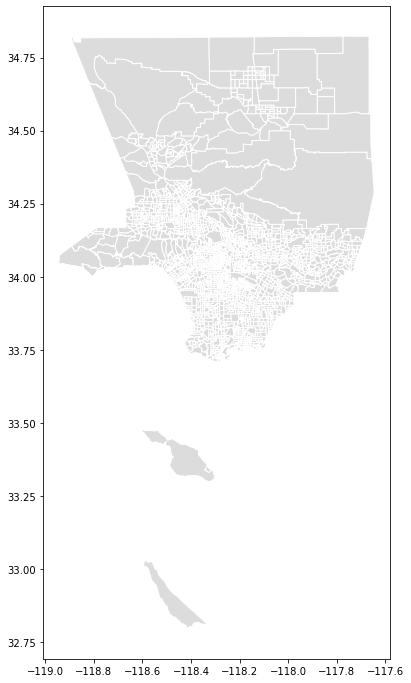

In [4]:
# plot it!
ax=neighborhoods.plot(figsize=(12,12),color='gainsboro', edgecolor='white')

## Get Crime Data from LA Open Data Portal
Next, we acquire the data using the socrata API. Use the socrata documentation to grab the code syntax for our crime data.
- https://dev.socrata.com/foundry/data.lacity.org/amvf-fr72

In [5]:
import pandas as pd
import plotly.express as px
from sodapy import Socrata

In [6]:
#Importing our arrest 2020 data using an API
client = Socrata("data.lacity.org", None)
results = client.get("amvf-fr72", 
                     limit=50000,
                     where = "(arst_date between '2020-01-01T00:00:00' and '2020-10-30T00:00:00') AND (grp_description in ('Aggravated Assault','Miscellaneous Other Violations','Driving Under Influence','Other Assaults','Narcotic Drug Laws'))",
                     order='arst_date desc')
df =pd.DataFrame.from_records(results)

In [7]:
df.shape

(31676, 25)

In [8]:
# columns
list(df)

['rpt_id',
 'report_type',
 'arst_date',
 'time',
 'area',
 'area_desc',
 'rd',
 'age',
 'sex_cd',
 'descent_cd',
 'chrg_grp_cd',
 'grp_description',
 'arst_typ_cd',
 'charge',
 'chrg_desc',
 'dispo_desc',
 'location',
 'lat',
 'lon',
 'location_1',
 'bkg_date',
 'bkg_time',
 'bgk_location',
 'bkg_loc_cd',
 'crsst']

## Convert data to a geodataframe

Geopandas allows us to convert different types of data into a spatial format.
- https://geopandas.org/gallery/create_geopandas_from_pandas.html

In [9]:
# convert pandas dataframe to geodataframe
crime = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lon, df.lat))

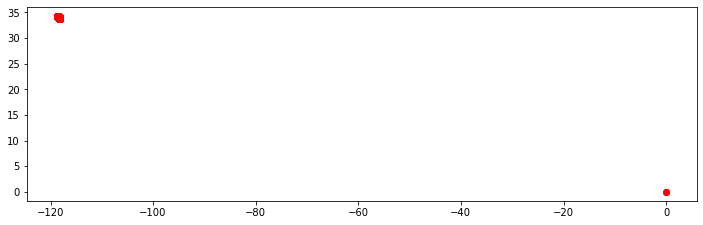

In [10]:
# map it!
crime.plot(figsize=(12,12),color='red')

## Create a two layer map

- https://geopandas.org/mapping.html

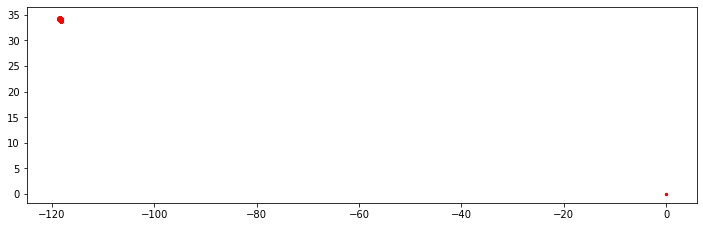

In [11]:
# first define which layers will be your "base"
base = neighborhoods.plot(figsize=(12,10),color='gainsboro', edgecolor='white')

# define the layer that will go on top, and add the base layer to the `ax` argument
ax = crime.plot(ax=base, color='red', markersize=5)

## Zoom to the points, not the neighborhoods

By default, the map has zoomed out to fit both layers. Sometimes, we may want to zoom to the extent of a smaller layer, in this case, the crime data.

In [12]:
# get the bounding box coordinates for the crime data
crime.geometry.total_bounds

array([-118.659 ,    0.    ,    0.    ,   34.3283])

In [13]:
# shortcut to put them into their own variables
minx, miny, maxx, maxy = crime.geometry.total_bounds
print(minx)
print(maxx)
print(miny)
print(maxy)


-118.659
0.0
0.0
34.3283


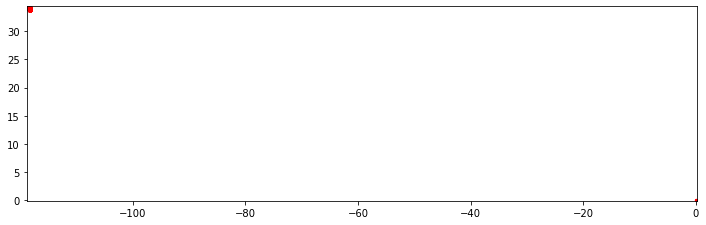

In [14]:
# use the bounding box coordinates to set the x and y limits
base = neighborhoods.plot(figsize=(12,12),color='gainsboro', edgecolor='white')
ax = crime.plot(ax=base, marker='o', color='red', markersize=5)
ax.set_xlim(minx - .1, maxx + .1) # added/substracted value is to give some margin around total bounds
ax.set_ylim(miny - .1, maxy + .1)
ax

## Joining crime to neighborhoods

Now that we have successfuly overlaid our two layers on a single map, we want to get some correlations between them. We do so first by conducting a spatial join that will allow us to summarize the number of crime instances per neighborhood.

First things first, whenever we do spatial analysis between two layers, make sure they are in the same projection.

In [15]:
# set the coordinate system to WGS84 for our crime data
crime.set_crs(epsg=4326, inplace=True)
crime.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [16]:
# check the coordinate system of our neighborhoods- CHANGE
neighborhoods.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## The spatial join

* https://geopandas.org/mergingdata.html?highlight=spatial%20join

In a Spatial Join, two geometry objects are merged based on their spatial relationship to one another.

The how argument specifies the type of join that will occur and which geometry is retained in the resultant geodataframe. It accepts the following options:

`left`: use the index from the first (or left_df) geodataframe that you provide to sjoin; retain only the left_df geometry column

`right`: use index from second (or right_df); retain only the right_df geometry column

`inner`: use intersection of index values from both geodataframes; retain only the left_df geometry column



In [17]:
# Do the spatial join
join = gpd.sjoin(neighborhoods,
                 crime,
                 how='right')

In [18]:
# Now every instance of crime is given a neighborhood it falls inside of
join.head()

,index_left,GEOID10,rpt_id,report_type,arst_date,time,area,area_desc,rd,age,...,location,lat,lon,location_1,bkg_date,bkg_time,bgk_location,bkg_loc_cd,crsst,geometry
10679,4.0,06037297602,5973272,BOOKING,2020-07-16T00:00:00.000,2230,05,Harbor,0587,23,...,500 W 26TH ST,33.7206,-118.288,"{'type': 'Point', 'coordinates': [-118.288, 33...",2020-07-17T00:00:00.000,0021,HARBOR,4205,NaN,POINT (-118.28800 33.72060)
25254,4.0,06037297602,5878242,BOOKING,2020-02-18T00:00:00.000,0800,05,Harbor,0589,27,...,2400 S PACIFIC AV,33.7218,-118.2880,"{'type': 'Point', 'coordinates': [-118.288, 33...",2020-02-18T00:00:00.000,0919,HARBOR,4205,NaN,POINT (-118.28800 33.72180)
20685,4.0,06037297602,5907373,BOOKING,2020-03-26T00:00:00.000,2015,05,Harbor,0587,37,...,600 W 37TH ST,33.7106,-118.2900,"{'type': 'Point', 'coordinates': [-118.29, 33....",2020-03-27T00:00:00.000,0022,77TH ST,4212,NaN,POINT (-118.29000 33.71060)
11687,4.0,06037297602,5966178,BOOKING,2020-07-05T00:00:00.000,0125,05,Harbor,0587,25,...,500 W 37TH ST,33.7106,-118.2921,"{'type': 'Point', 'coordinates': [-118.2921, 3...",2020-07-05T00:00:00.000,0330,HARBOR,4205,NaN,POINT (-118.29210 33.71060)
18422,4.0,06037297602,5920033,BOOKING,2020-04-23T00:00:00.000,1900,05,Harbor,0587,21,...,500 W 37TH ST,33.7106,-118.2921,"{'type': 'Point', 'coordinates': [-118.2921, 3...",2020-04-23T00:00:00.000,2048,HARBOR,4205,NaN,POINT (-118.29210 33.71060)


Next, we create a dataframe that counts crime by neighborhood:

In [19]:
crime_by_neighborhoods = join.GEOID10.value_counts().rename_axis('GEOID10').reset_index(name='crime_count')

In [20]:
crime_by_neighborhoods.head()

,GEOID10,crime_count
0,06037980028,805
1,06037206300,551
2,06037206200,342
3,06037207710,284
4,06037128210,265


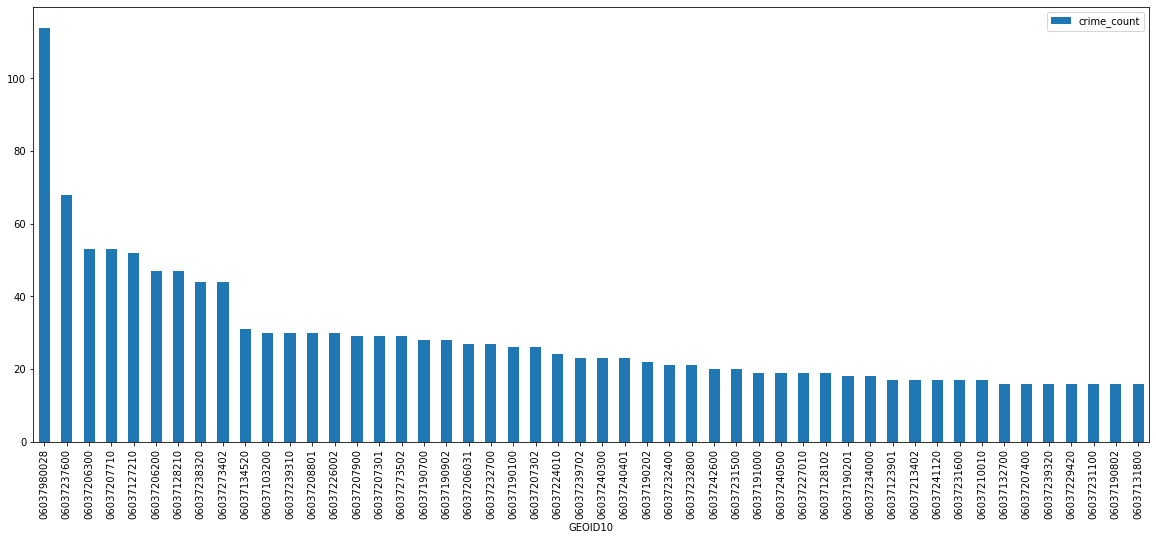

In [50]:
# make a bar chart
crime_by_neighborhoods[:50].plot.bar(figsize=(20,8),x='GEOID10',y='crime_count')

## Join the value counts back to the neighborhoods

The bar chart is nice, but what we also want is a choropleth map to accompany it. To do so, we merge the counts back to the neighborhoods.

In [22]:
# join the summary table back to the neighborhood geodatabase
#calculate by census tracts - change to crime tract

neighborhoods=neighborhoods.merge(crime_by_neighborhoods,on='GEOID10')

In [23]:
# our neighborhood table now has a count column
neighborhoods.head()

,GEOID10,geometry,crime_count
0,06037297602,"POLYGON ((-118.28799 33.72259, -118.28799 33.7...",24
1,06037297601,"MULTIPOLYGON (((-118.28449 33.70997, -118.2842...",15
2,06037293306,"POLYGON ((-118.29996 33.78349, -118.29750 33.7...",11
3,06037295103,"POLYGON ((-118.28209 33.76675, -118.28304 33.7...",11
4,06037980015,"POLYGON ((-118.28449 33.79085, -118.28439 33.7...",13


## Map neighborhoods by crime count

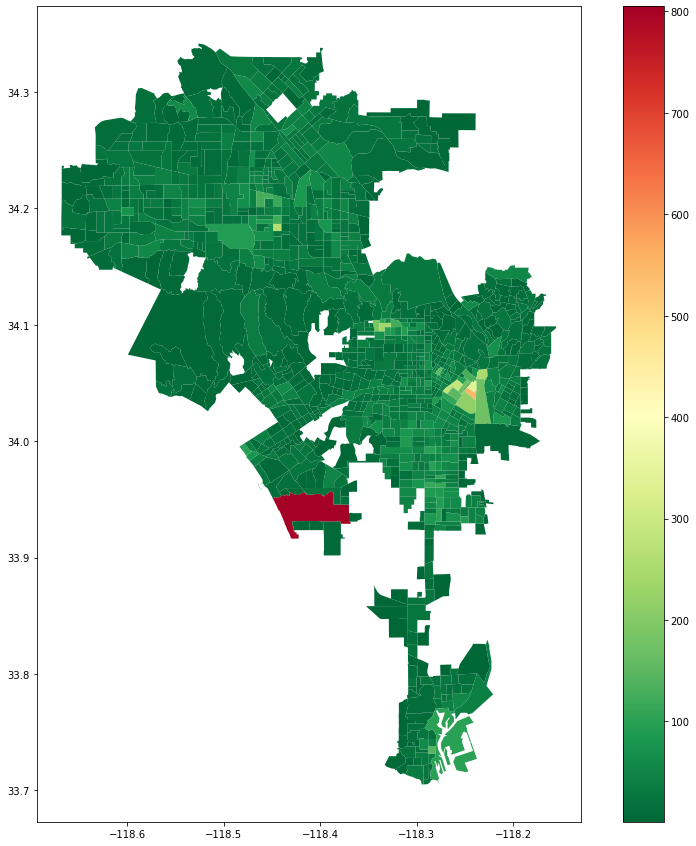

In [24]:
# plot it!
neighborhoods.plot(figsize=(15,15),column='crime_count',legend=True,cmap='RdYlGn_r')

## Cleanup: Adding basemaps, titles...

In [ ]:
# for basemaps
import contextily as ctx

In [ ]:
# reproject to web mercator
neighborhoods = neighborhoods.to_crs(epsg=3857)

In [ ]:
ax = neighborhoods.plot(figsize=(15,15),
                        column='crime_count',
                        legend=True,
                        alpha=0.8,
                        cmap='RdYlGn_r')

ax.axis('off')
ax.set_title('September 2020 Arrests by the LAPD',fontsize=22)
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

## Make an interactive map

To create an interactive version of the same map, let's use plotly express. Since we projected our data to web mercator, note that we have to project it back to WGS84 to work with plotly.

In [ ]:
import plotly.express as px

In [ ]:
# reproject to web mercator
neighborhoods = neighborhoods.to_crs(epsg=4326)

In [ ]:
neighborhoods.crs

## Get the center lat/lon

Plotly maps requires you to give it center coordinates. Let's calculate this based on the data.

First, get the bounding box coordinates of the neighborhoods:

In [ ]:
minx, miny, maxx, maxy = neighborhoods.geometry.total_bounds

In [ ]:
center_lat=(maxy-miny)/2+miny
center_lat

In [ ]:
center_lon=(maxx-minx)/2+minx
center_lon

In [ ]:
# map it!
fig = px.choropleth_mapbox(neighborhoods, 
                           geojson=neighborhoods.geometry, 
                           locations=neighborhoods.index, 
                           color='crime_count',
                           color_continuous_scale="rdylgn_r",
                           mapbox_style="carto-positron",
                           zoom=9, 
                           center = {"lat": center_lat, "lon": center_lon},
                           hover_name=neighborhoods.name,
                           opacity=0.5
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

## Saving as HTML

In [ ]:
# save it
fig.write_html("lacrime.html")